# AI Tools Dataset 🪄⚙️🔩
 **Dataset Description:**
The "5000 AI Tools Dataset" is a comprehensive collection of artificial intelligence (AI) tools curated to assist data enthusiasts, researchers, and professionals in the field of machine learning and data science. This dataset contains valuable information about a wide range of AI tools, including their names, descriptions, pricing models, recommended use cases, charges (if applicable), user reviews, tool links, and major categories. 

## Data Fields

- AI Tool Name: The name of the AI tool or software.
- Description: A brief description of the tool's features and capabilities.
- Free/Paid/Other: Indicates whether the tool is available for free, has a paid subscription model, or falls under another pricing category.
- Useable For: Describes the primary use cases or applications for which the AI tool is suitable.
- Charges: Specifies the cost or pricing structure associated with the tool (if applicable).
- Review: User-generated reviews and ratings to provide insights into the tool's performance and user satisfaction.
- Tool Link: URL or link to access the AI tool's official website or download page.
- Major Category: Categorizes the AI tools into broader domains or categories, such as natural language processing (NLP), computer vision, data analytics, and more.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
import networkx as nx
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/ai-5000-tools-2023/all_ai_tool.csv")
df.head(10)

,AI Tool Name,Description,Free/Paid/Other,Useable For,Charges,Review,Tool Link,Major Category
0,Farm3D,Learning Articulated 3D Animals by Distilling ...,Free,/ experiments / 3D,NaN,NaN,https://farm3d.github.io/?utm_source=futureped...,other
1,Mailbutler Ai,"AI-powered Smart Assistant for Outlook, Gmail ...",Freemium,/ email assistant,$ 4.95/mo,1,https://www.mailbutler.io/smart-assistant/?utm...,text
2,Maverick,Send customers personalized videos at scale.,Paid,/ e-commerce / audio editing,$ 100/mo,NaN,https://www.trymaverick.com/?utm_source=future...,audio
3,0Xai,Stable Diffusion Prompt And Images Generator,Free,/ image generator / prompts,NaN,NaN,https://0xai.quest?utm_source=futurepedia&utm_...,image
4,10Web,AI-powered WordPress platform for automated we...,Freemium,/ low-code/no-code,NaN,NaN,https://10web.io/?utm_source=futurepedia&utm_m...,code
5,1Pm Workout,Become The Next One Punch Man!,Free,/ fitness,NaN,NaN,https://opmworkout.ml/?utm_source=futurepedia&...,other
6,2D&3D Video Converter,iDATAPP 3D Converter: Transform Your Videos in...,Free,/ 3D,NaN,NaN,https://idatapp.com/software/3d-converter?utm_...,3D
7,2Short.Ai,Elevate your YT content with AI generated shorts,Freemium,/ video editing / social media assistant,$9.90,1,https://2short.ai/?utm_source=futurepedia&utm_...,text
8,2Siq,Forward emails and get replies.,Freemium,/ email assistant,$3,NaN,https://2siq.com/?utm_source=futurepedia&utm_m...,text
9,3Dfy,3DFY.ai is an artificial intelligence (AI) too...,Free,/ 3D,NaN,NaN,https://3dfy.ai/?utm_source=futurepedia&utm_me...,3D


In [3]:
rows,cols = df.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)

Number of rows:  4969
Number of columns:  8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AI Tool Name     4969 non-null   object
 1   Description      4969 non-null   object
 2   Free/Paid/Other  4969 non-null   object
 3   Useable For      4969 non-null   object
 4   Charges          2534 non-null   object
 5   Review           1462 non-null   object
 6   Tool Link        4969 non-null   object
 7   Major Category   4969 non-null   object
dtypes: object(8)
memory usage: 310.7+ KB


In [5]:
df.describe()

,AI Tool Name,Description,Free/Paid/Other,Useable For,Charges,Review,Tool Link,Major Category
count,4969,4969,4969,4969,2534,1462,4969,4969
unique,4969,4965,19,526,557,17,4959,8
top,Farm3D,Understand any data instantly using AI,Free,/ productivity,$ 10/mo,1,https://www.trymaverick.com/?utm_source=future...,business
freq,1,2,1704,247,99,942,2,1202


# Dataset Overview

In [6]:
# Number of tools in the dataset
total_tools = df.shape[0]

# Number of missing values for each column
missing_values = df.isnull().sum()

dataset_overview = {
    "Total AI Tools": total_tools,
    "Missing Descriptions": missing_values["Description"],
    "Missing Pricing Info": missing_values["Free/Paid/Other"],
    "Missing Use Cases": missing_values["Useable For"],
    "Missing Charges Info": missing_values["Charges"],
    "Missing Reviews": missing_values["Review"],
    "Missing Tool Links": missing_values["Tool Link"],
    "Missing Major Categories": missing_values["Major Category"]
}

dataset_overview

{'Total AI Tools': 4969,
 'Missing Descriptions': 0,
 'Missing Pricing Info': 0,
 'Missing Use Cases': 0,
 'Missing Charges Info': 2435,
 'Missing Reviews': 3507,
 'Missing Tool Links': 0,
 'Missing Major Categories': 0}

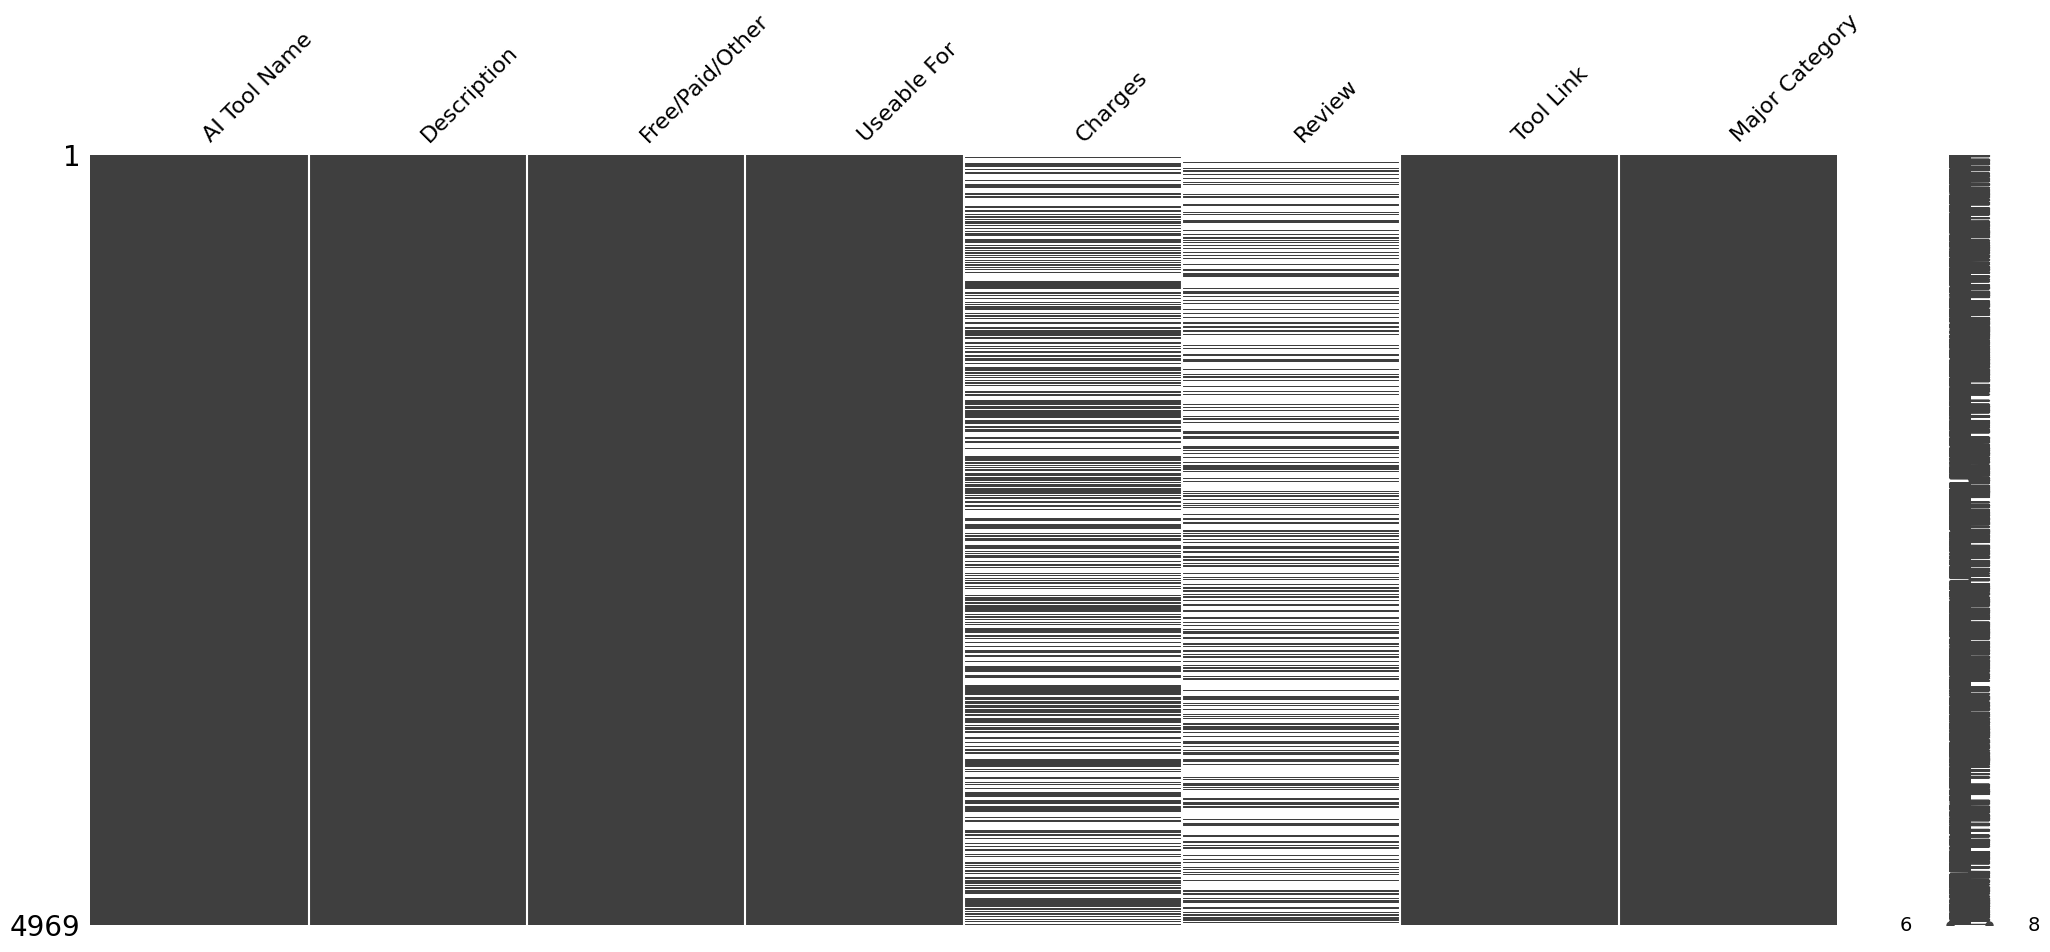

In [7]:
 # check for missing values
msno.matrix(df);

In [8]:
# Summary
charges_summary = df['Charges'].describe()
print(charges_summary)

count        2534
unique        557
top       $ 10/mo
freq           99
Name: Charges, dtype: object


In [9]:
# Pricing Distribution
pricing_distribution = df["Free/Paid/Other"].value_counts()

pricing_distribution

Free/Paid/Other
Free                             1704
Freemium                         1284
Paid                              832
Free Trial                        771
Contact for Pricing               325
Freemium | Free-Trial              15
Freemium | Deals                    8
Free-Trial | Paid                   8
Free-Trial | Freemium               8
Free-Trial | Deals                  3
Paid |Free-Trial                    3
FreeDeals                           1
FreeFreemium                        1
Freemium |Contact for Pricing       1
Freemium | Free                     1
Paid | Deals                        1
Free | Freemium | Paid              1
Free | Paid                         1
Deals                               1
Name: count, dtype: int64

In [10]:
# Category Distribution
category_distribution = df["Major Category"].value_counts()

category_distribution

business_rows = df[df['Major Category'] == 'Business']

business_rows.head(10)

,AI Tool Name,Description,Free/Paid/Other,Useable For,Charges,Review,Tool Link,Major Category


In [11]:
# Reviews Overview
reviews_overview = df["Review"].describe()

reviews_overview

count     1462
unique      17
top          1
freq       942
Name: Review, dtype: object

In [12]:
# Distribution of unique review values
review_distribution = df["Review"].value_counts()

review_distribution

Review
1            942
2            256
3            108
4             53
6             20
5             20
8             17
7             16
9              8
10             6
11             4
undefined      3
14             3
13             2
15             2
42             1
22             1
Name: count, dtype: int64

In [13]:
# Filtering tools with reviews greater than 1 and sorting them
top_tools_by_review = df[df["Review"] > "1"].sort_values(by="Review", ascending=False).head(10)

# Selecting relevant columns for display
top_tools_by_review = top_tools_by_review[["AI Tool Name", "Description", "Review", "Major Category", "Tool Link"]]

top_tools_by_review

,AI Tool Name,Description,Review,Major Category,Tool Link
1854,Gocharlie Ai,A generative AI platform for content creators!,undefined,text,https://gocharlie.ai/?utm_source=futurepedia&u...
4637,Vidyo.Ai,"Create short clips from long videos, save 90% ...",undefined,video,https://vidyo.ai/?utm_source=futurepedia&utm_m...
2666,Maverick,AI-generated personalized videos at scale,undefined,video,https://www.trymaverick.com/?utm_source=future...
4468,Ttsmaker,Free text-to-speech tool that offers over 100+...,9,audio,https://ttsmaker.com?utm_source=futurepedia&ut...
4204,Syllaby,Create Your Social Media Strategy In 10 Minutes,9,text,https://www.syllaby.io?utm_source=futurepedia&...
1907,Gptforslides,"Generate Beautiful Presentations with Images, ...",9,business,https://www.gptforslides.app/?utm_source=futur...
1326,Docus,"Providing personalized health insights, recomm...",9,other,https://docus.ai/?utm_source=futurepedia&utm_m...
4420,Traivl,Personalized multi-destination Travel Itinerary,9,other,https://www.traivl.com/?utm_source=futurepedia...
4256,Tammy Ai,YouTube summaries for free. 10x your learning ...,9,business,https://tammy.ai/?utm_source=futurepedia&utm_m...
656,Booke Ai,Streamline your bookkeeping business with AI-d...,9,business,https://booke.ai?utm_source=futurepedia&utm_me...


In [14]:
# Charges Distribution: Displaying the most common pricing structures or charges for AI tools
charges_distribution = df["Charges"].value_counts().head(10)

charges_distribution

Charges
$ 10/mo      99
$ 9/mo       90
$ 19/mo      88
$ 29/mo      72
$ 5/mo       68
$ 9.99/mo    62
$ 15/mo      62
$ 20/mo      53
$5           46
$ 49/mo      45
Name: count, dtype: int64

## Here's the distribution of the most common pricing structures or charges for AI tools:

- $10/month: 99 tools

- $9/month: 90 tools

- $19/month: 88 tools

- $29/month: 72 tools

- $5/month: 68 tools

- $9.99/month: 62 tools

- $15/month: 62 tools

- $20/month: 53 tools

- $5 (one-time or unspecified): 46 tools

- $49/month: 45 tools

**This provides a glimpse into the prevalent pricing models in the AI tool space.**

## Now let's list some of the top FREE AI tools based on their categories. We'll consider the top 3 tools from each major category.

In [15]:
# Top Free Tools based on their categories
free_tools = df[df["Free/Paid/Other"] == "Free"]

# Group by major category and get top 3 tools from each category
# top_free_tools_by_category = free_tools.groupby("Major Category").head(3)
top_free_tools_by_category = free_tools.sort_values(by="Review", ascending=False).groupby("Major Category").head(3)

top_free_tools_by_category = top_free_tools_by_category.sort_values(by="Major Category")

# Selecting relevant columns for display
top_free_tools_by_category = top_free_tools_by_category[["AI Tool Name", "Description", "Major Category", "Tool Link"]]

top_free_tools_by_category

,AI Tool Name,Description,Major Category,Tool Link
3566,Recraft,"Generate vector art, 3D images and more",3D,https://www.recraft.ai/?utm_source=futurepedia...
3924,Skybox Lab,Skybox Lab: One-click 360° image generator fro...,3D,https://skybox.blockadelabs.com/?utm_source=fu...
851,Chatcad,AI-powered app enabling easy creation of 3D mo...,3D,https://www.chatcad.app/?utm_source=futurepedi...
1703,Free Text To Speech Online,Free Text To Speech Online is a powerful and v...,audio,https://www.text-to-speech.online/?utm_source=...
4468,Ttsmaker,Free text-to-speech tool that offers over 100+...,audio,https://ttsmaker.com?utm_source=futurepedia&ut...
3987,Songr,Generate fully-produced custom songs from just...,audio,https://app.songr.ai/?utm_source=futurepedia&u...
3367,Project.Supplies,Streamline your DIY projects with Project Supp...,business,https://project.supplies/?utm_source=futureped...
4256,Tammy Ai,YouTube summaries for free. 10x your learning ...,business,https://tammy.ai/?utm_source=futurepedia&utm_m...
1613,Finchat.Io,FinChat generates answers to questions about ...,business,https://finchat.io/?utm_source=futurepedia&utm...
1007,Codeium,AI-powered code acceleration toolkit to code s...,code,https://www.codeium.com/?utm_source=futurepedi...


In [16]:
# Group by major category and get top 3 tools from each category
top_free_tools_by_category = df.sort_values(by="Review", ascending=False).groupby("Major Category").head(3)

top_free_tools_by_category = top_free_tools_by_category.sort_values(by="Major Category")

# Selecting relevant columns for display
top_free_tools_by_category = top_free_tools_by_category[["AI Tool Name", "Description", "Major Category", 'Charges', "Tool Link"]]

top_free_tools_by_category

,AI Tool Name,Description,Major Category,Charges,Tool Link
851,Chatcad,AI-powered app enabling easy creation of 3D mo...,3D,NaN,https://www.chatcad.app/?utm_source=futurepedi...
3924,Skybox Lab,Skybox Lab: One-click 360° image generator fro...,3D,NaN,https://skybox.blockadelabs.com/?utm_source=fu...
3566,Recraft,"Generate vector art, 3D images and more",3D,NaN,https://www.recraft.ai/?utm_source=futurepedia...
1646,Fliki,Create videos from blog posts in 2 mins,audio,$ 8/mo,/tool/fliki
3726,Rythmex,Convert Audio to Text with Rythmex Transcriber...,audio,$ 25/mo,https://rythmex.com/?utm_source=futurepedia&ut...
4468,Ttsmaker,Free text-to-speech tool that offers over 100+...,audio,NaN,https://ttsmaker.com?utm_source=futurepedia&ut...
1907,Gptforslides,"Generate Beautiful Presentations with Images, ...",business,$0,https://www.gptforslides.app/?utm_source=futur...
4256,Tammy Ai,YouTube summaries for free. 10x your learning ...,business,NaN,https://tammy.ai/?utm_source=futurepedia&utm_m...
656,Booke Ai,Streamline your bookkeeping business with AI-d...,business,$ 30/mo,https://booke.ai?utm_source=futurepedia&utm_me...
1007,Codeium,AI-powered code acceleration toolkit to code s...,code,NaN,https://www.codeium.com/?utm_source=futurepedi...


Aggregate number of reviews for free tools: 1211
Aggregate number of reviews for paid tools: 315


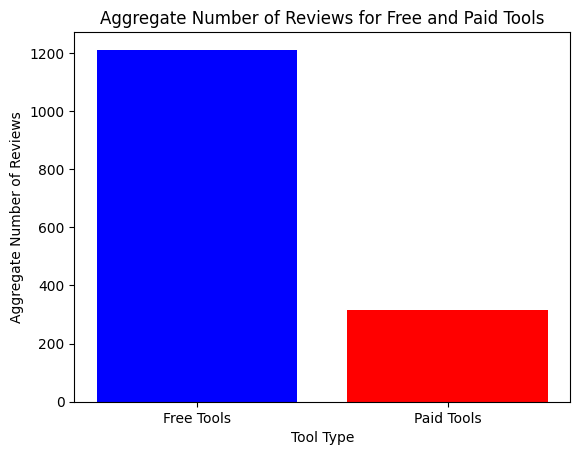

In [17]:
# Calculate the aggregate number of reviews for free tools
aggregate_reviews_free = pd.to_numeric(df[df["Free/Paid/Other"] == "Free"]["Review"], errors='coerce').dropna().astype(int).sum()

# Convert the "Reviews" column to integers and calculate the aggregate number of reviews for paid tools (ignoring NaN values and non-numeric strings)
aggregate_reviews_paid = pd.to_numeric(df[df["Free/Paid/Other"] == "Paid"]["Review"], errors='coerce').dropna().astype(int).sum()

# Print the results
print("Aggregate number of reviews for free tools:", aggregate_reviews_free)
print("Aggregate number of reviews for paid tools:", aggregate_reviews_paid)

categories = ['Free Tools', 'Paid Tools']
aggregate_reviews = [aggregate_reviews_free, aggregate_reviews_paid]

plt.bar(categories, aggregate_reviews, color=['blue', 'red'])
plt.xlabel('Tool Type')
plt.ylabel('Aggregate Number of Reviews')
plt.title('Aggregate Number of Reviews for Free and Paid Tools')
plt.show()

## Exploring the Major Category column

In [18]:
df['Major Category'] = df['Major Category'].str.capitalize()

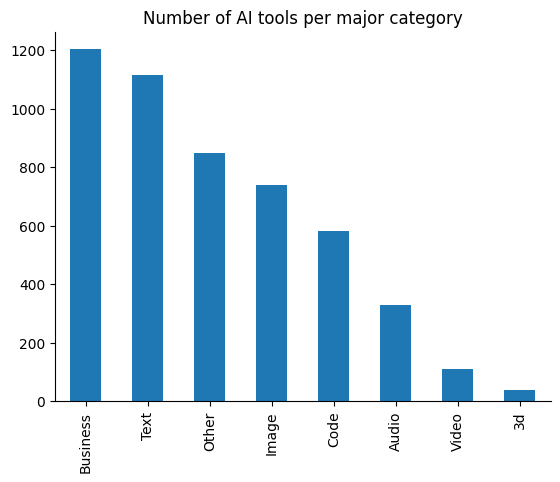

In [19]:
# Business and text categories have the most tools
df['Major Category'].value_counts().plot(kind='bar', xlabel='', title='Number of AI tools per major category',
                                         grid=False)
sns.despine();

## Exploring Useable for column

In [20]:
def get_formatted_uses(uses):
    formatted_uses = []
    for use in uses.split('/'):
        if use := use.strip():
            formatted_uses.append(use.capitalize())
    return formatted_uses


df['Useable For'] = df['Useable For'].map(get_formatted_uses)

In [21]:
uses_count = df['Useable For'].explode().value_counts()
labels = ['Rare', 'Less common', 'Common', 'Frequent']
uses_distribution = pd.qcut(uses_count, q=4, labels=labels)

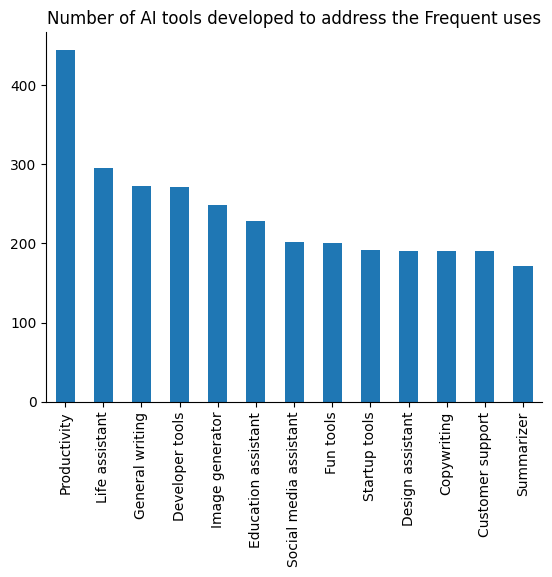

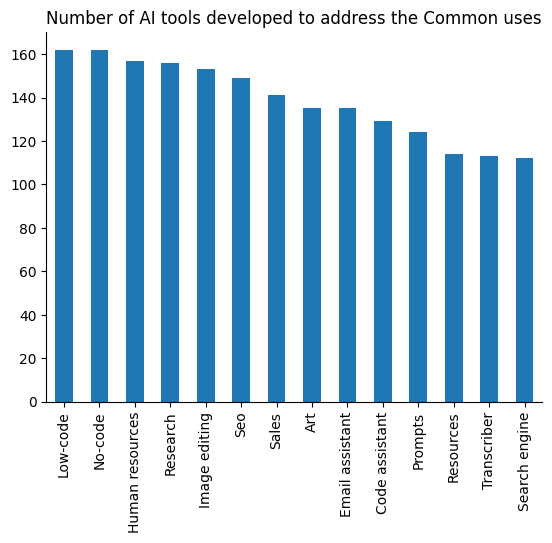

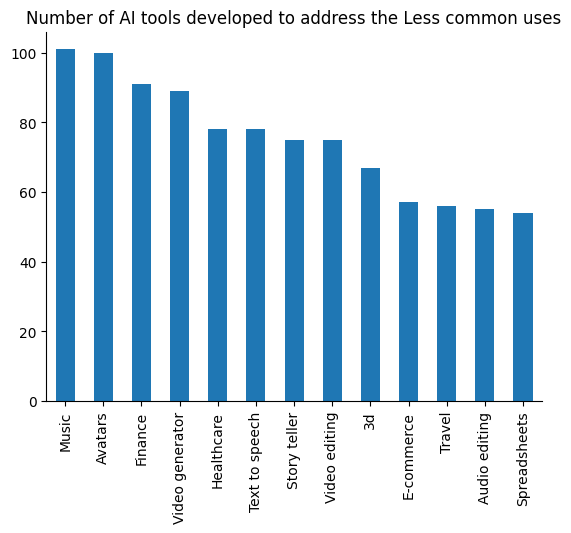

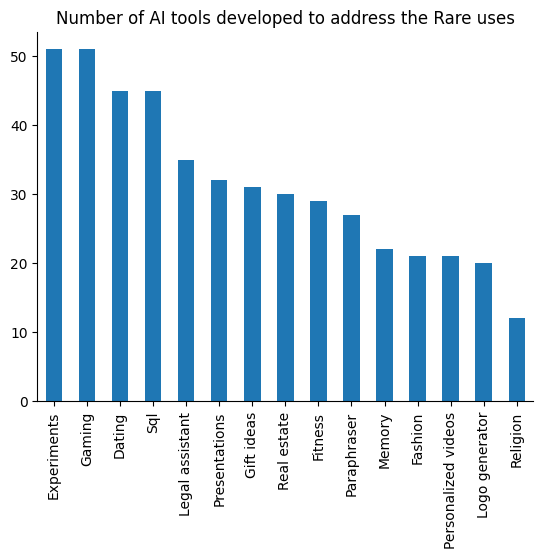

In [22]:
for label in reversed(labels):
    ax = uses_count[uses_distribution == label].plot(kind='bar', grid=False, title=f'Number of AI tools developed to address the {label} uses', xlabel='')
    sns.despine()
    plt.show();

In [23]:
import plotly.express as px

df["Review"] = df["Review"].replace("undefined", None).astype(float)

df["Charges"] = df["Charges"].str.extract(r'(\d+)').astype(float)

scatter_data = df[df["Review"].notna()]

fig = px.scatter(
    scatter_data,
    x="Charges",  # Pricing on the X-axis
    y="Review",   # Number of reviews on the Y-axis
    color="Free/Paid/Other",  # Color points by pricing model
    hover_name="AI Tool Name",  # Show AI tool names on hover
    title="Scatter Plot of Number of Reviews vs. Pricing",
    labels={'Charges': 'Pricing', 'Review': 'Number of Reviews'},
    template="plotly",  # Use the default Plotly template
)

# Customize the appearance
fig.update_layout(
    xaxis_title="Pricing",  # X-axis label
    yaxis_title="Number of Reviews",  # Y-axis label
    showlegend=True,  # Display a legend
    legend_title="Pricing Model",  # Legend title
)

# Show the chart
fig.show()